Welcome to our trial exam, where we will examine the dataset "customers.csv".

In [640]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


Firstly, we load the dataset.

In [641]:
df = pd.read_csv("./data/customers.csv")

In [642]:
df.loc[655]

birth-year                           1975.0
education                        Graduation
marital-status                     Divorced
income                             153924.0
kids-at-home                            0.0
teens-at-home                           0.0
date-of-customer-origin          07-02-2014
days-since-last-purchase               81.0
amount-spent-on-wines                   1.0
amount-spent-on-fruit                   1.0
amount-spent-on-meat                    1.0
amount-spent-on-fish                    1.0
amount-spent-on-sweets                  1.0
amount-spent-on-gold                    1.0
number-of-deals-purchases               0.0
number-of-web-purchases                 0.0
number-of-catalogue-purchases           0.0
number-of-in-store-purchases            0.0
number-of-web-visits                    0.0
complain                                0.0
accept-last-campaign-offer              0.0
Name: 655, dtype: object

In [643]:
df.describe()

,birth-year,income,kids-at-home,teens-at-home,days-since-last-purchase,amount-spent-on-wines,amount-spent-on-fruit,amount-spent-on-meat,amount-spent-on-fish,amount-spent-on-sweets,amount-spent-on-gold,number-of-deals-purchases,number-of-web-purchases,number-of-catalogue-purchases,number-of-in-store-purchases,number-of-web-visits,complain,accept-last-campaign-offer
count,2196.000000,2165.000000,2202.000000,2196.000000,2196.000000,2197.000000,2191.000000,2197.000000,2191.000000,2196.000000,2204.000000,2199.000000,2202.000000,2196.000000,2181.000000,2196.000000,2195.000000,2204.000000
mean,1968.795537,52291.030485,0.443688,0.507741,49.061931,304.751024,26.305340,166.651343,37.635326,26.931239,44.211434,2.320146,4.076748,2.671676,5.802384,5.316029,0.009567,0.149274
std,12.004236,25270.062301,0.539034,0.544539,28.957636,337.096616,39.797907,225.209709,54.789850,41.012663,52.378782,1.930623,2.786026,2.935470,3.251240,2.425817,0.097365,0.356439
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35441.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51479.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [644]:
df.isna().sum()

birth-year                       44
education                        49
marital-status                   44
income                           75
kids-at-home                     38
teens-at-home                    44
date-of-customer-origin          40
days-since-last-purchase         44
amount-spent-on-wines            43
amount-spent-on-fruit            49
amount-spent-on-meat             43
amount-spent-on-fish             49
amount-spent-on-sweets           44
amount-spent-on-gold             36
number-of-deals-purchases        41
number-of-web-purchases          38
number-of-catalogue-purchases    44
number-of-in-store-purchases     59
number-of-web-visits             44
complain                         45
accept-last-campaign-offer       36
dtype: int64

In [645]:
# plt.figure(figsize=(10, 6))
# df["birth-year"].value_counts().sort_index().plot.bar()
# plt.show()

Hypothesis 1
- Do people with a lower income spend a larger amount of money per purchase? 

Hypothesis 2
- Do people with a lower income buy more deal-purchases? 

Other hypotheses: 
- Do customers who complain spend less money at the store?
- Do people with kids at home buy more sweets?
- How does income affect how much is spent on ie. fruit compared to sweets?
- Do people with a lower income spend a higher percentage of their income at the store?

### Hypothesis 1:
From our own experience working in a supermarket, we belive that people with a lower income shop a less amount of times, but buy more in bulk when there are good deals on products. This has made us develop the following hypothesis:
- People with a lower income spend a larger amount of money per purchase.

Snce we want to investigate something related to income, we want to remove all the cells where there is no value in the 'Income' field.

In [646]:
# Remove rows where income is null
df_without_null_income = df.dropna(subset=["income"])

In [647]:
df_without_null_income.isna().sum()

birth-year                       43
education                        46
marital-status                   42
income                            0
kids-at-home                     36
teens-at-home                    43
date-of-customer-origin          40
days-since-last-purchase         44
amount-spent-on-wines            39
amount-spent-on-fruit            46
amount-spent-on-meat             43
amount-spent-on-fish             47
amount-spent-on-sweets           42
amount-spent-on-gold             34
number-of-deals-purchases        38
number-of-web-purchases          38
number-of-catalogue-purchases    43
number-of-in-store-purchases     54
number-of-web-visits             42
complain                         42
accept-last-campaign-offer       35
dtype: int64

Since we would like to look at the amount spent by customers, we will create a new column called 'TotalAmount' which is the sum of the columns 'amount-spent-on-wines', 'amount-spent-on-fruit', 'amount-spent-on-meat', 'amount-spent-on-fish', 'amount-spent-on-sweets', 'amount-spent-on-gold'. Before we can do this, we need to take care of the missing values in all these columns. Firstly, we want to examine some of the columns with null-values in the amount-spent-on-* columns.

In [648]:
# A function to retrieve rows where 'column_names' is null
def get_null_rows(df, column_names):
    return df[df[column_names].isna().any(axis=1)]

# Call the get_null_rows function to retrieve rows where 'amount-spent-on-*' is null
null_rows = get_null_rows(df_without_null_income, ['amount-spent-on-wines', 'amount-spent-on-fruit', 'amount-spent-on-meat', 'amount-spent-on-fish','amount-spent-on-sweets','amount-spent-on-gold'])

# Display the null rows to examine them further
null_rows[['amount-spent-on-wines', 'amount-spent-on-fruit', 'amount-spent-on-meat', 'amount-spent-on-fish','amount-spent-on-sweets','amount-spent-on-gold']]

,amount-spent-on-wines,amount-spent-on-fruit,amount-spent-on-meat,amount-spent-on-fish,amount-spent-on-sweets,amount-spent-on-gold
0,635.0,88.0,NaN,172.0,88.0,88.0
3,NaN,4.0,20.0,10.0,3.0,5.0
5,520.0,42.0,98.0,0.0,42.0,NaN
14,3.0,14.0,17.0,NaN,1.0,5.0
16,53.0,5.0,NaN,2.0,13.0,4.0
...,...,...,...,...,...,...
2197,293.0,8.0,124.0,NaN,4.0,106.0
2210,302.0,29.0,131.0,NaN,0.0,27.0
2229,3.0,2.0,NaN,20.0,0.0,17.0
2234,3.0,3.0,7.0,6.0,2.0,NaN


From the data shown above, it becomes clear that the null value in terms of amount of money spent is because the data is missing and not that missing values is inherently equivalent to 0. This becomes apparent in e.g. entry 5, where they have spent 0 on fish, but NaN on gold. This means that we cannot just assume that missing values in these columns can be replaced with 0, and we therefore need to consider how to handle these missing values in the most correct way. A way to handle missing data is by using a regression model to predict the missing values. We can do this by using the iterative imputer from the sickit-learn library.

In [649]:
# Function to impute missing values using IterativeImputer
def impute_missing_values(df, columns_to_impute, max_iter=10, random_state=0):
    df_copy = df.copy()
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    for column in columns_to_impute:
        imputer.fit(df_copy[[column]])
        imputed_column = imputer.transform(df_copy[[column]])
        # Round the imputed values
        df_copy[column] = np.round(imputed_column, 0)  
    return df_copy

# Impute the missing values from the amount-spent-on-* columns
df_without_null_amounts = impute_missing_values(df_without_null_income, ['amount-spent-on-wines', 'amount-spent-on-fruit', 'amount-spent-on-meat', 'amount-spent-on-fish','amount-spent-on-sweets','amount-spent-on-gold'])

In [650]:
# Check if there are any null values left in the amount-spent-on-* columns
df_without_null_amounts.isna().sum()

birth-year                       43
education                        46
marital-status                   42
income                            0
kids-at-home                     36
teens-at-home                    43
date-of-customer-origin          40
days-since-last-purchase         44
amount-spent-on-wines             0
amount-spent-on-fruit             0
amount-spent-on-meat              0
amount-spent-on-fish              0
amount-spent-on-sweets            0
amount-spent-on-gold              0
number-of-deals-purchases        38
number-of-web-purchases          38
number-of-catalogue-purchases    43
number-of-in-store-purchases     54
number-of-web-visits             42
complain                         42
accept-last-campaign-offer       35
dtype: int64

We see that in the different columns containing numbers of different types of purchases, there are null values present. We want to look at these rows to determine wether this is because the data is missing, or if it is equivalent to 0.

In [651]:
# Call the get_null_rows function to retrieve rows where number of purchases is null
null_rows = get_null_rows(df_without_null_amounts, ['number-of-deals-purchases', 'number-of-web-purchases', 'number-of-catalogue-purchases', 'number-of-in-store-purchases'])

# Display the null rows to examine them further
null_rows[['number-of-deals-purchases','number-of-web-purchases', 'number-of-catalogue-purchases', 'number-of-in-store-purchases']]

,number-of-deals-purchases,number-of-web-purchases,number-of-catalogue-purchases,number-of-in-store-purchases
32,2.0,2.0,NaN,4.0
42,1.0,0.0,0.0,NaN
50,1.0,NaN,2.0,10.0
75,1.0,1.0,NaN,2.0
96,NaN,7.0,4.0,6.0
...,...,...,...,...
2182,1.0,NaN,1.0,4.0
2193,1.0,7.0,7.0,NaN
2199,4.0,3.0,NaN,3.0
2208,NaN,1.0,0.0,3.0


As we saw before with the missing amount values, we come to a similar conclusion here that the missing values cannot inherently be replaced by 0. We take the same approach as earlier and impute the missing values using our function 'impute_missing_values', that uses the iterative imputer from the sickit-learn library.

In [652]:
df_without_null_purchases = impute_missing_values(df_without_null_amounts, ['number-of-deals-purchases','number-of-in-store-purchases', 'number-of-web-purchases', 'number-of-catalogue-purchases'])

In [653]:
df_without_null_purchases.isna().sum()

birth-year                       43
education                        46
marital-status                   42
income                            0
kids-at-home                     36
teens-at-home                    43
date-of-customer-origin          40
days-since-last-purchase         44
amount-spent-on-wines             0
amount-spent-on-fruit             0
amount-spent-on-meat              0
amount-spent-on-fish              0
amount-spent-on-sweets            0
amount-spent-on-gold              0
number-of-deals-purchases         0
number-of-web-purchases           0
number-of-catalogue-purchases     0
number-of-in-store-purchases      0
number-of-web-visits             42
complain                         42
accept-last-campaign-offer       35
dtype: int64

We have now prepared the data that we are going to use to create the new column 'total_amount_spent'. We will now create a function that calculates the total amount spent by a customer and apply this function to the dataframe. 

In [654]:
# This function takes a DataFrame, a new column name and a list of columns to sum for each row
# The DataFrame is then returned with the new sum-column added
def sum_row_values(df, new_column, columns_to_sum):
    df[new_column] = df[columns_to_sum].sum(axis=1)
    return df

In [655]:
# For each coloum with an amount of money spent, we sum together to create a new column with this sum
df_with_total_column = sum_row_values(df_without_null_purchases, 'total_amount_spent', ['amount-spent-on-wines', 'amount-spent-on-fruit', 'amount-spent-on-meat', 'amount-spent-on-fish','amount-spent-on-sweets','amount-spent-on-gold'])

We now have a column with the total amount spent by each customer. We will now create a new column called 'total_amout_of_purchases' which is the number of purchases made by each customer, where we sum the number of purchases made on the web, in a catalogue, and in store. 

In [656]:
# For each column with an amount of purchases (deals, in store, web, catalogue), we sum together to create a new column with this sum
df_with_total_column = sum_row_values(df_with_total_column, 'total_num_purchases', ['number-of-deals-purchases','number-of-web-purchases', 'number-of-catalogue-purchases', 'number-of-in-store-purchases'])

We now have both the total amount spent by each customer and the total number of purchases made by each customer. Since we now want to calculate the average amount spent per purchase for each customers, we want to start by checking if there are any rows where the total amount of purchases are equal to 0, as we most likely would want to exclude these rows from our analysis.

In [657]:
#test_df = df_with_total_column[df_with_total_column['number-of-deals-purchases'] >= df_with_total_column['total_num_purchases']]
df_with_zero_purchases = df_with_total_column[df_with_total_column['total_num_purchases']==0]
df_with_zero_purchases

,birth-year,education,marital-status,income,kids-at-home,teens-at-home,date-of-customer-origin,days-since-last-purchase,amount-spent-on-wines,amount-spent-on-fruit,...,amount-spent-on-gold,number-of-deals-purchases,number-of-web-purchases,number-of-catalogue-purchases,number-of-in-store-purchases,number-of-web-visits,complain,accept-last-campaign-offer,total_amount_spent,total_num_purchases
655,1975.0,Graduation,Divorced,153924.0,0.0,0.0,07-02-2014,81.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
981,1965.0,Graduation,Divorced,4861.0,0.0,0.0,22-06-2014,20.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,172.0,0.0
1524,1973.0,Graduation,Single,3502.0,1.0,0.0,13-04-2013,56.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,5.0,0.0
2132,1949.0,PhD,Married,156924.0,0.0,0.0,29-08-2013,85.0,306.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0


In [658]:
# Percentage of rows with no purchases
(4/(len(df_with_total_column)))*100

0.18475750577367206

Since there are only 4 rows where the total amount of purchases are equal to 0, we will remove these rows from the dataset as they constitute a very small percentage of the dataset (0,18%).

In [659]:
# Remove columns where total number of purchases is 0
df_with_total_column = df_with_total_column[df_with_total_column['total_num_purchases'] > 0]

We now have both the total amount spent by each customer and the total number of purchases made by each customer. We will now create a new column called 'average_amount_spent' which is the average amount spent by each customer per purchase. We will now create a function that calculates the average amount spent by a customer per purchase and apply this function to the dataframe.

In [663]:
# This function takes a DataFrame, a new column name, a column to divide and a column to divide by
# The DataFrame is then returned with the new divided column added
def divide_row_values(df, new_column, column_todivide, column_divider):
    df_copy = df.copy()
    df_copy[new_column] = round(df_copy[column_todivide] / df_copy[column_divider],2)
    return df_copy

In [664]:
df_with_avg_amount = divide_row_values(df_with_total_column, 'avg_amount_per_purchase', 'total_amount_spent', 'total_num_purchases')

In [665]:
df_with_avg_amount

,birth-year,education,marital-status,income,kids-at-home,teens-at-home,date-of-customer-origin,days-since-last-purchase,amount-spent-on-wines,amount-spent-on-fruit,...,number-of-deals-purchases,number-of-web-purchases,number-of-catalogue-purchases,number-of-in-store-purchases,number-of-web-visits,complain,accept-last-campaign-offer,total_amount_spent,total_num_purchases,avg_amount_per_purchase
0,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,...,3.0,8.0,10.0,4.0,7.0,0.0,1.0,1238.0,25.0,49.52
1,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,...,2.0,1.0,1.0,2.0,5.0,0.0,0.0,27.0,6.0,4.50
2,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,...,1.0,8.0,2.0,10.0,4.0,0.0,0.0,776.0,21.0,36.95
3,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,306.0,4.0,...,2.0,2.0,0.0,4.0,6.0,0.0,0.0,348.0,8.0,43.50
4,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,...,5.0,5.0,3.0,6.0,5.0,0.0,0.0,422.0,19.0,22.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967.0,Graduation,NaN,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,...,2.0,9.0,3.0,4.0,5.0,0.0,0.0,1341.0,18.0,74.50
2236,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,...,7.0,8.0,2.0,5.0,7.0,0.0,0.0,518.0,22.0,23.55
2237,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,...,1.0,2.0,3.0,13.0,6.0,0.0,0.0,1241.0,19.0,65.32
2238,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,...,2.0,6.0,5.0,10.0,3.0,0.0,0.0,843.0,23.0,36.65


<Axes: xlabel='income', ylabel='avg_amount_per_purchase'>

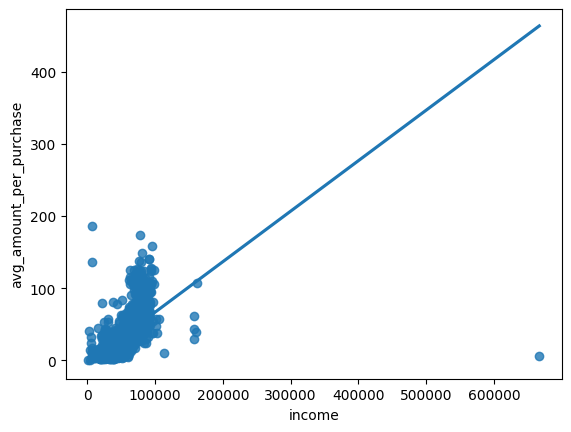

In [666]:
x = df_with_avg_amount['income']
y = df_with_avg_amount['avg_amount_per_purchase']
tmp_df = pd.DataFrame(zip(x, y), columns=['income', 'avg_amount_per_purchase'])
sns.regplot(x='income', y='avg_amount_per_purchase', data=tmp_df, ci=None)

In [667]:
result_df = df_with_avg_amount[df_with_avg_amount['income'] > 200000]
result_df

,birth-year,education,marital-status,income,kids-at-home,teens-at-home,date-of-customer-origin,days-since-last-purchase,amount-spent-on-wines,amount-spent-on-fruit,...,number-of-deals-purchases,number-of-web-purchases,number-of-catalogue-purchases,number-of-in-store-purchases,number-of-web-visits,complain,accept-last-campaign-offer,total_amount_spent,total_num_purchases,avg_amount_per_purchase
2233,1977.0,Graduation,Together,666666.0,1.0,0.0,02-06-2013,23.0,9.0,14.0,...,4.0,3.0,1.0,3.0,6.0,0.0,NaN,62.0,11.0,5.64


<Axes: xlabel='income', ylabel='avg_amount_per_purchase'>

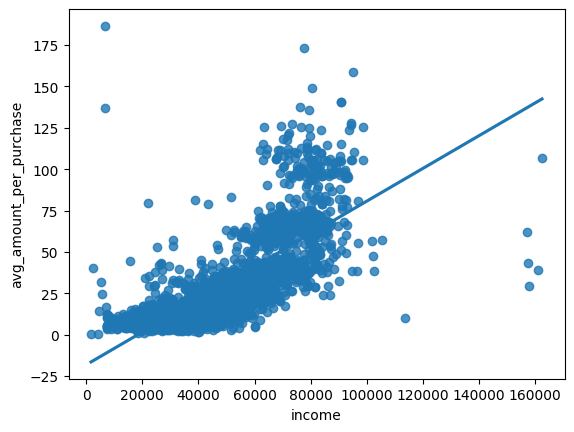

In [668]:
df_without_outlier = df_with_avg_amount[df_with_avg_amount['income'] < 200000]

x = df_without_outlier['income']
y = df_without_outlier['avg_amount_per_purchase']
tmp_df = pd.DataFrame(zip(x, y), columns=['income', 'avg_amount_per_purchase'])
sns.regplot(x='income', y='avg_amount_per_purchase', data=tmp_df, ci=None)